In [34]:
import pandas as pd
import calendar

df = pd.read_csv('data.csv')

Eliminando atributos

In [35]:
del df['description']
del df['title']
del df['price_period']
del df['l6']
del df['l5']
del df['id']

Discriminando data

In [36]:
df = df.loc[df['l2'] == 'Capital Federal']
df = df.loc[df['operation_type'] == 'Venta']
df = df.loc[df['property_type'] == 'Departamento']
df = df.loc[df['currency'] == 'USD']
del df['property_type']
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,operation_type
46,Propiedad,2020-08-30,2020-09-18,2020-08-30,-34.589252,-58.419934,Argentina,Capital Federal,Palermo,NaN,1.0,0.0,1.0,NaN,NaN,105000.0,USD,Venta
49,Propiedad,2020-08-30,2020-09-23,2020-08-30,-34.550353,-58.461575,Argentina,Capital Federal,Belgrano,NaN,1.0,1.0,1.0,38.0,35.0,99000.0,USD,Venta
50,Propiedad,2020-08-30,2020-09-15,2020-08-30,NaN,NaN,Argentina,Capital Federal,Recoleta,NaN,1.0,1.0,1.0,27.0,27.0,94500.0,USD,Venta
54,Propiedad,2020-08-30,2021-01-06,2020-08-30,-34.598226,-58.429706,Argentina,Capital Federal,Villa Crespo,NaN,1.0,1.0,1.0,NaN,NaN,110000.0,USD,Venta
55,Propiedad,2020-08-30,2021-01-06,2020-08-30,-34.598226,-58.429706,Argentina,Capital Federal,Villa Crespo,NaN,1.0,1.0,1.0,NaN,NaN,118000.0,USD,Venta


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111268 entries, 46 to 999956
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ad_type          111268 non-null  object 
 1   start_date       111268 non-null  object 
 2   end_date         111268 non-null  object 
 3   created_on       111268 non-null  object 
 4   lat              103663 non-null  float64
 5   lon              103634 non-null  float64
 6   l1               111268 non-null  object 
 7   l2               111268 non-null  object 
 8   l3               110829 non-null  object 
 9   l4               5389 non-null    object 
 10  rooms            104820 non-null  float64
 11  bedrooms         90489 non-null   float64
 12  bathrooms        106275 non-null  float64
 13  surface_total    81620 non-null   float64
 14  surface_covered  82529 non-null   float64
 15  price            111268 non-null  float64
 16  currency         111268 non-null  obj

Transform & clean

In [6]:
def divide_by_one_thounsans(x):
    return x / 1000


df['created_on'] = pd.to_datetime(df['created_on'])
df['surface_total'].fillna((df['surface_total'].mean()), inplace=True)
df['surface_covered'].fillna((df['surface_covered'].mean()), inplace=True)
df['bedrooms'].fillna((df['bedrooms'].mean()), inplace=True)
df['rooms'].fillna((df['rooms'].mean()), inplace=True)
df['price'] = df['price'].apply(divide_by_one_thounsans)


Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

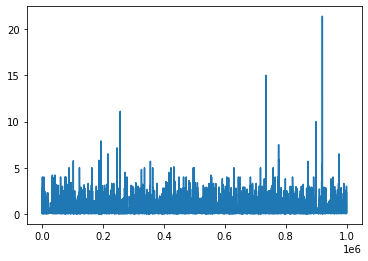

In [10]:
#import matplotlib.pyplot as plt
df['price'].plot()

<AxesSubplot:>

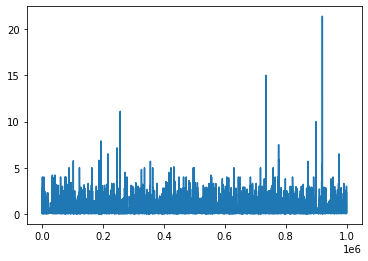

In [11]:
df['price'] = df['price'].loc[df['price'] < 1000]
df['price'].plot()

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

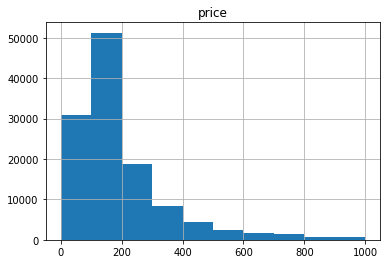

In [16]:
df.hist(column='price')

<AxesSubplot:>

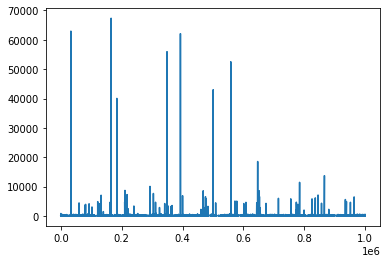

In [12]:
df['surface_covered'].plot()

<AxesSubplot:>

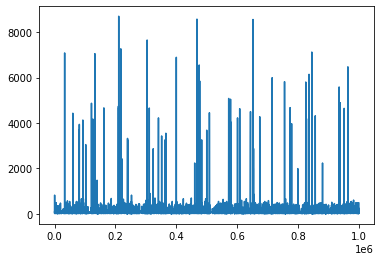

In [13]:
df['surface_covered'] = df['surface_covered'].loc[df['surface_covered'] < 10000]
df['surface_covered'].plot()

<AxesSubplot:>

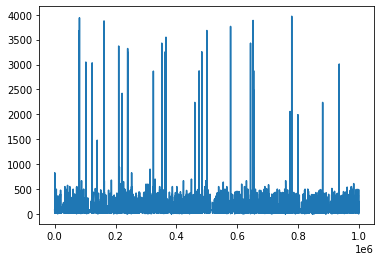

In [14]:
df['surface_covered'] = df['surface_covered'].loc[df['surface_covered'] < 4000]
df['surface_covered'].plot()

<AxesSubplot:>

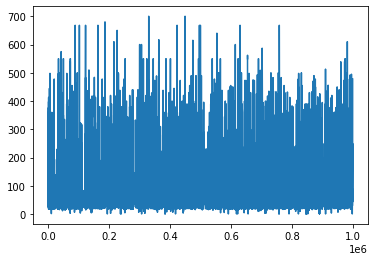

In [15]:
df['surface_covered'] = df['surface_covered'].loc[df['surface_covered'] < 750]
df['surface_covered'].plot()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111268 entries, 46 to 999956
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ad_type          111268 non-null  object        
 1   start_date       111268 non-null  object        
 2   end_date         111268 non-null  object        
 3   created_on       111268 non-null  datetime64[ns]
 4   lat              103663 non-null  float64       
 5   lon              103634 non-null  float64       
 6   l1               111268 non-null  object        
 7   l2               111268 non-null  object        
 8   l3               110829 non-null  object        
 9   l4               5389 non-null    object        
 10  rooms            111268 non-null  float64       
 11  bedrooms         111268 non-null  float64       
 12  bathrooms        106275 non-null  float64       
 13  surface_total    111268 non-null  float64       
 14  surface_covered  11

### ¿Cómo influye el barrio en el precio por m2?

In [ ]:
# corren antes de "Transform & clean"
df['surface_total'].fillna((df['surface_total']), inplace=True)
df['price'].fillna((df['price']), inplace=True)

In [ ]:
df["price_usd_per_m2"] = df["price"] / df["surface_total"]

In [40]:
import matplotlib.pyplot as plt
def get_top_places(df, num, cheapest):
    return df.groupby(['l3'])['price_usd_per_m2'].mean().sort_values(ascending=cheapest).head(num)
    
def plot_top_places(df, num, cheapest,colour,title):
    graph = get_top_places(df, num, cheapest).sort_values().plot.barh(figsize=(15,5),color=colour,fontsize=15)
    graph.set_title(title, fontsize=20)
    graph.set_ylabel("Barrio", fontsize=18)
    graph.set_xlabel("USD/m2", fontsize=18)
    plt.show()

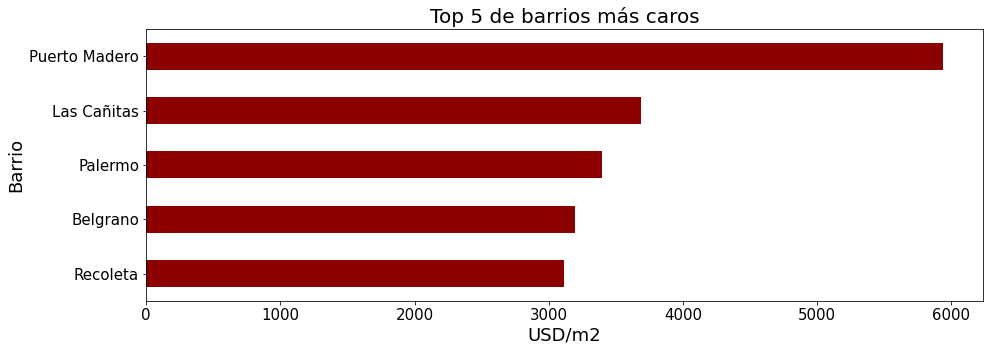

In [52]:
plot_top_places(df,5, False,'darkred',"Top 5 de barrios más caros")

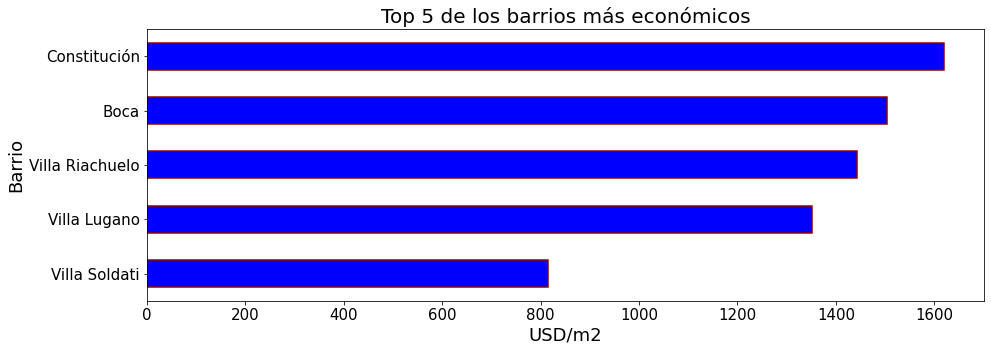

In [53]:
top5_cheap_CABA = get_top_places(df,5, True)
graph4 = top5_cheap_CABA.sort_values().plot.barh(figsize=(15,5),color='blue',edgecolor='darkred',lineWidth = 1.5,fontsize=15)
graph4.set_title("Top 5 de los barrios más económicos", fontsize=20)
graph4.set_ylabel("Barrio", fontsize=18)
graph4.set_xlabel("USD/m2", fontsize=18)
plt.show()